Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

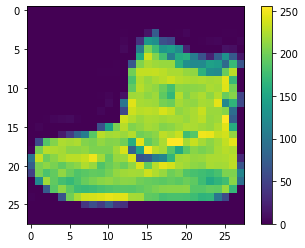

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6697 - accuracy: 0.7643 - val_loss: 0.4275 - val_accuracy: 0.8430
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3973 - accuracy: 0.8558 - val_loss: 0.3824 - val_accuracy: 0.8597
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3592 - accuracy: 0.8694 - val_loss: 0.3417 - val_accuracy: 0.8768
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3343 - accuracy: 0.8792 - val_loss: 0.3359 - val_accuracy: 0.8813
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3269 - accuracy: 0.8797 - val_loss: 0.3276 - val_accuracy: 0.8817


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.03882801, -0.0775107 ,  0.06353425, ...,  0.06253392,
         0.04938958,  0.06067714],
       [-0.07258235, -0.03786014, -0.06958096, ..., -0.00944109,
        -0.02168358,  0.00129658],
       [ 0.0422853 ,  0.10876656, -0.00945245, ..., -0.15133415,
         0.07725054, -0.07226828],
       ...,
       [ 0.00620231,  0.05406466, -0.09328471, ...,  0.08578992,
         0.01523147, -0.00673731],
       [ 0.13136828,  0.0242603 , -0.20158675, ..., -0.06861972,
         0.06908516, -0.03374689],
       [ 0.05319893,  0.05887481, -0.04752751, ..., -0.18520539,
         0.09888826,  0.02905107]], dtype=float32)

In [9]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros(256)

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, pesos_camada_dense_zerados]
)

modelo.layers[1].get_weights()


[array([[0.07794704, 0.27478462, 0.7901183 , ..., 0.34768987, 0.32367167,
         0.29957944],
        [0.52314365, 0.01009171, 0.20910294, ..., 0.573925  , 0.44857827,
         0.17341301],
        [0.6015723 , 0.3509788 , 0.41783166, ..., 0.05419871, 0.80187577,
         0.7071685 ],
        ...,
        [0.39292076, 0.3076322 , 0.89441216, ..., 0.56631875, 0.77411824,
         0.7171185 ],
        [0.8444291 , 0.5530232 , 0.07229248, ..., 0.9374956 , 0.5875365 ,
         0.7845173 ],
        [0.359962  , 0.7150326 , 0.69193226, ..., 0.4346067 , 0.03030153,
         0.19643511]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [10]:
modelo.layers

In [11]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 172.6324 - accuracy: 0.2844 - val_loss: 16.9185 - val_accuracy: 0.6538
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 29.4679 - accuracy: 0.6022 - val_loss: 7.4364 - val_accuracy: 0.7665
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 12.6680 - accuracy: 0.6745 - val_loss: 5.4407 - val_accuracy: 0.7125
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 6.4825 - accuracy: 0.7036 - val_loss: 3.6126 - val_accuracy: 0.6993
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.3298 - accuracy: 0.7375 - val_loss: 2.0483 - val_accuracy: 0.7651


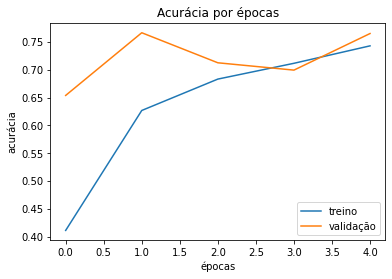

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


In [13]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

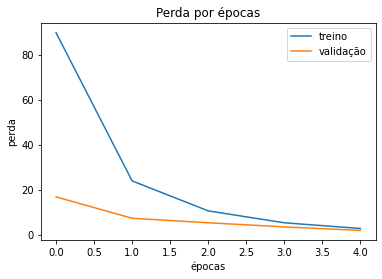

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [15]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [16]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [17]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

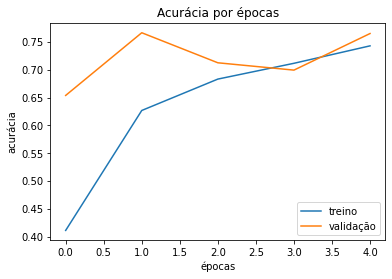

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

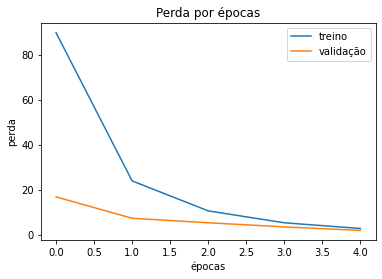

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [20]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 8
número da imagem de teste: 2
resultado teste modelo salvo: 8
número da imagem de teste: 2


Avaliando o modelo

In [21]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 30878.7773 - accuracy: 0.1000
Perda do teste: 30878.77734375
Acurácia do teste: 0.10000000149011612
